<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

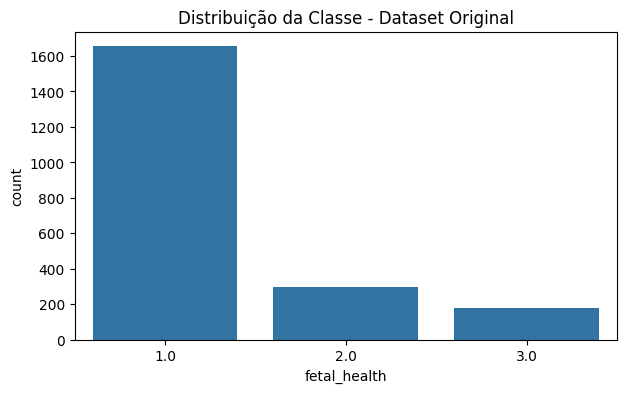

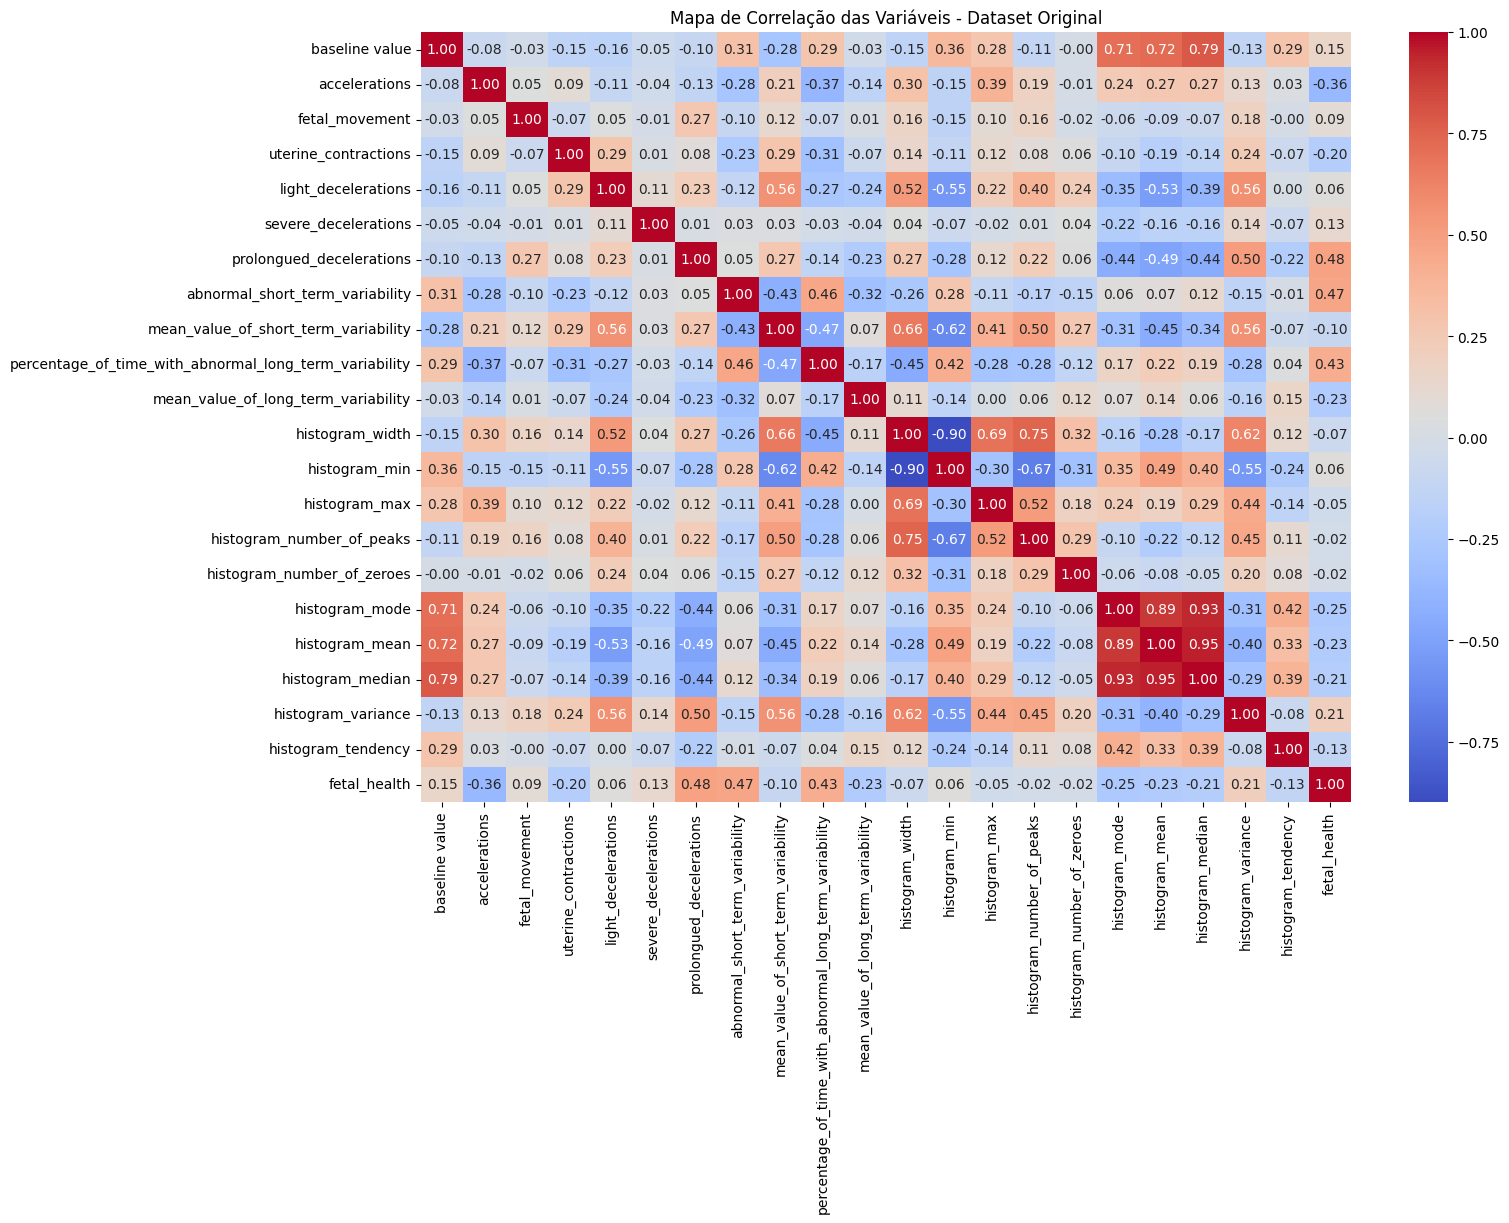

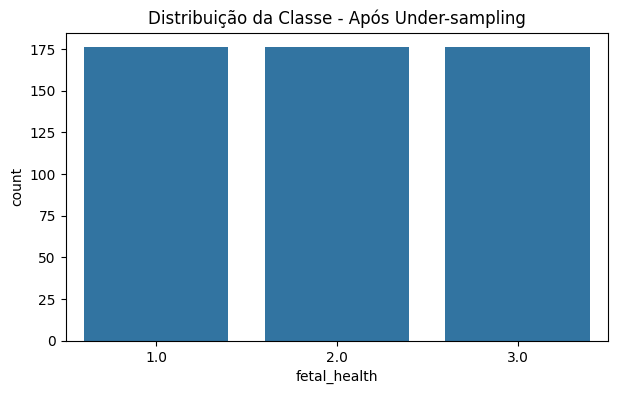

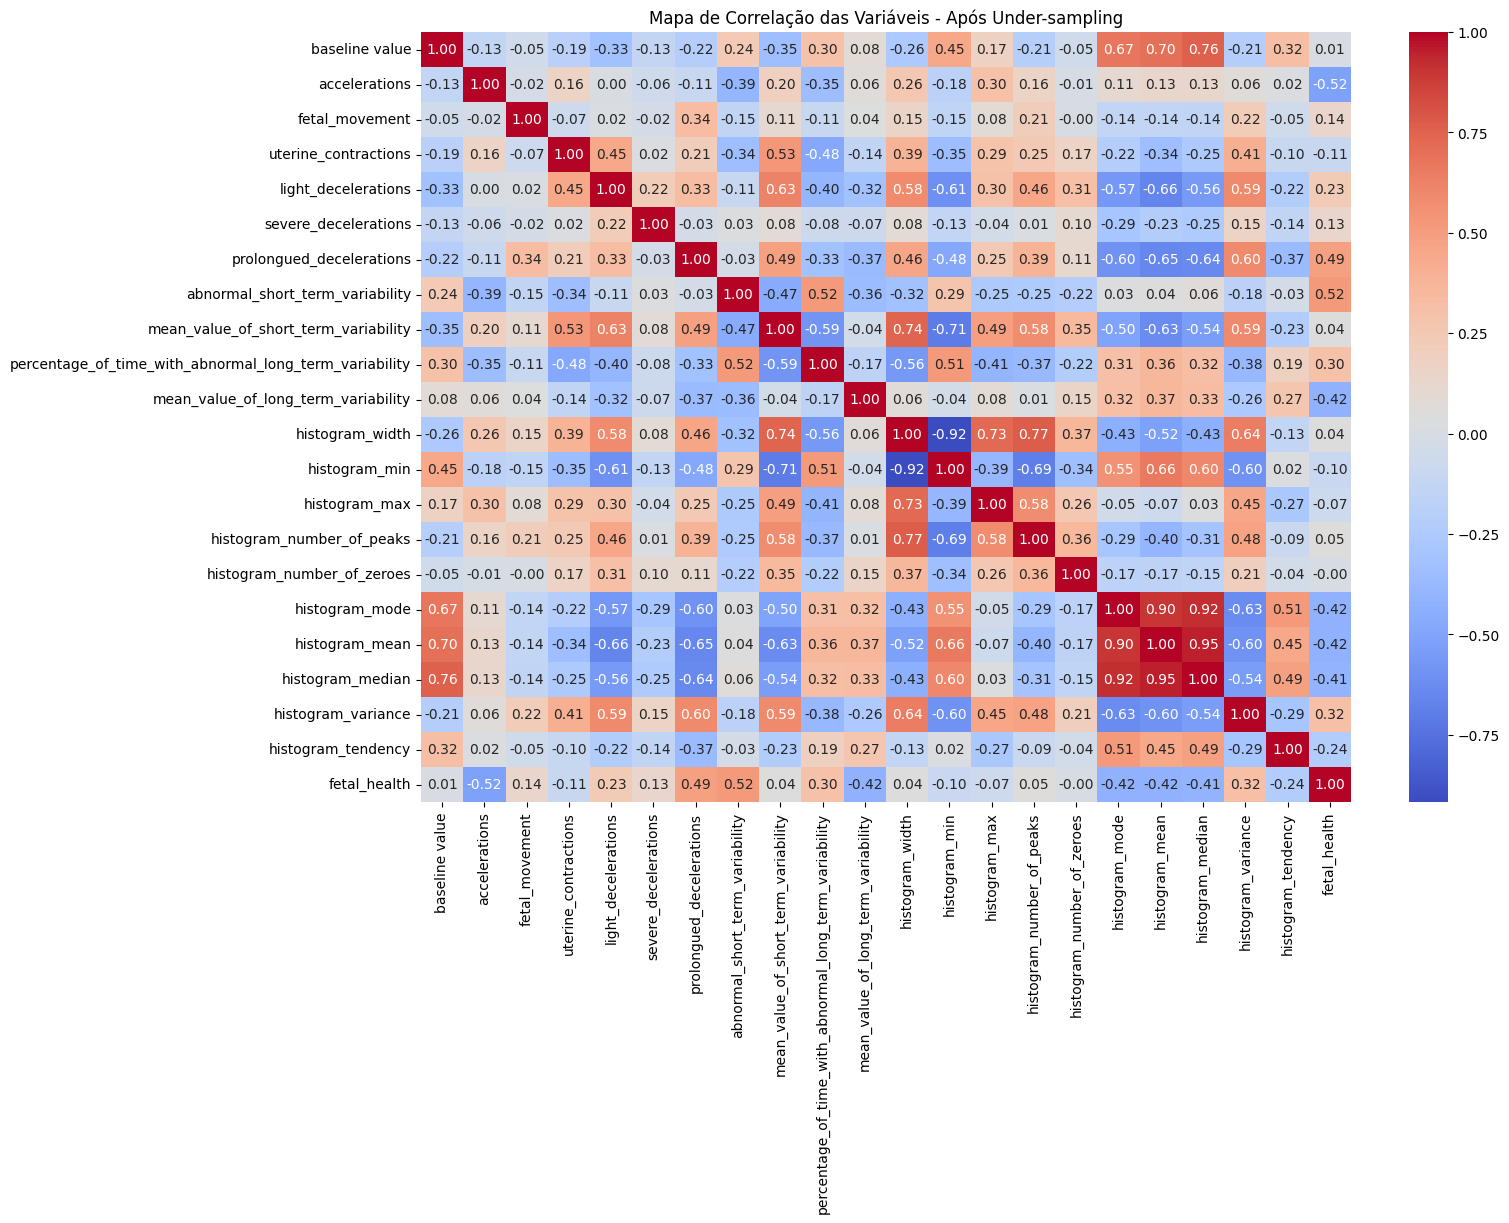

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Métricas para Under-sampling
Matriz de Confusão:
[[53  1  3]
 [13 32  3]
 [ 0  9 45]]


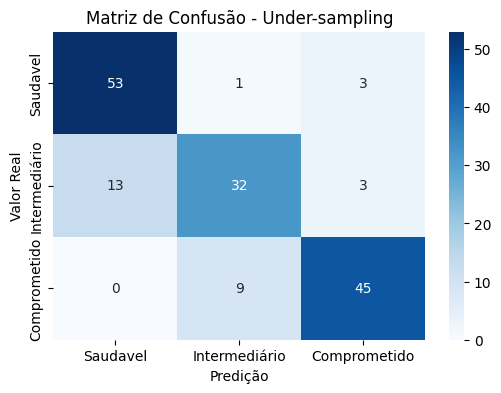

Relatório de Classificação:
              precision    recall  f1-score   support

         1.0       0.80      0.93      0.86        57
         2.0       0.76      0.67      0.71        48
         3.0       0.88      0.83      0.86        54

    accuracy                           0.82       159
   macro avg       0.82      0.81      0.81       159
weighted avg       0.82      0.82      0.81       159

AUC-ROC: 0.9349755746212575


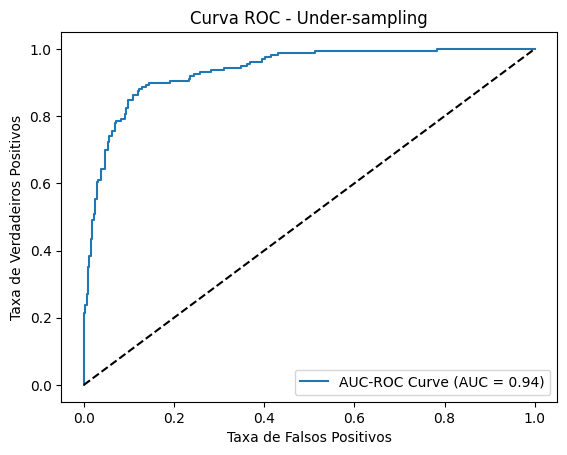

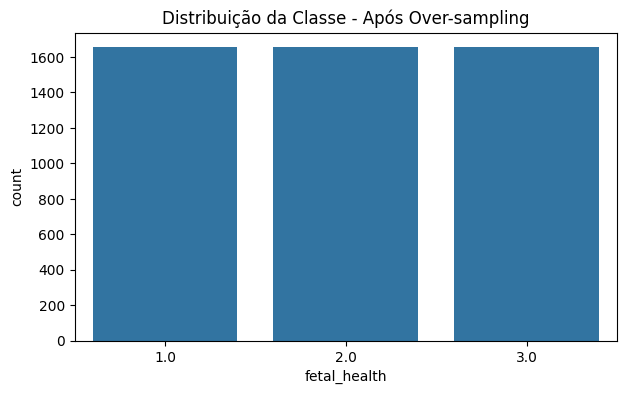

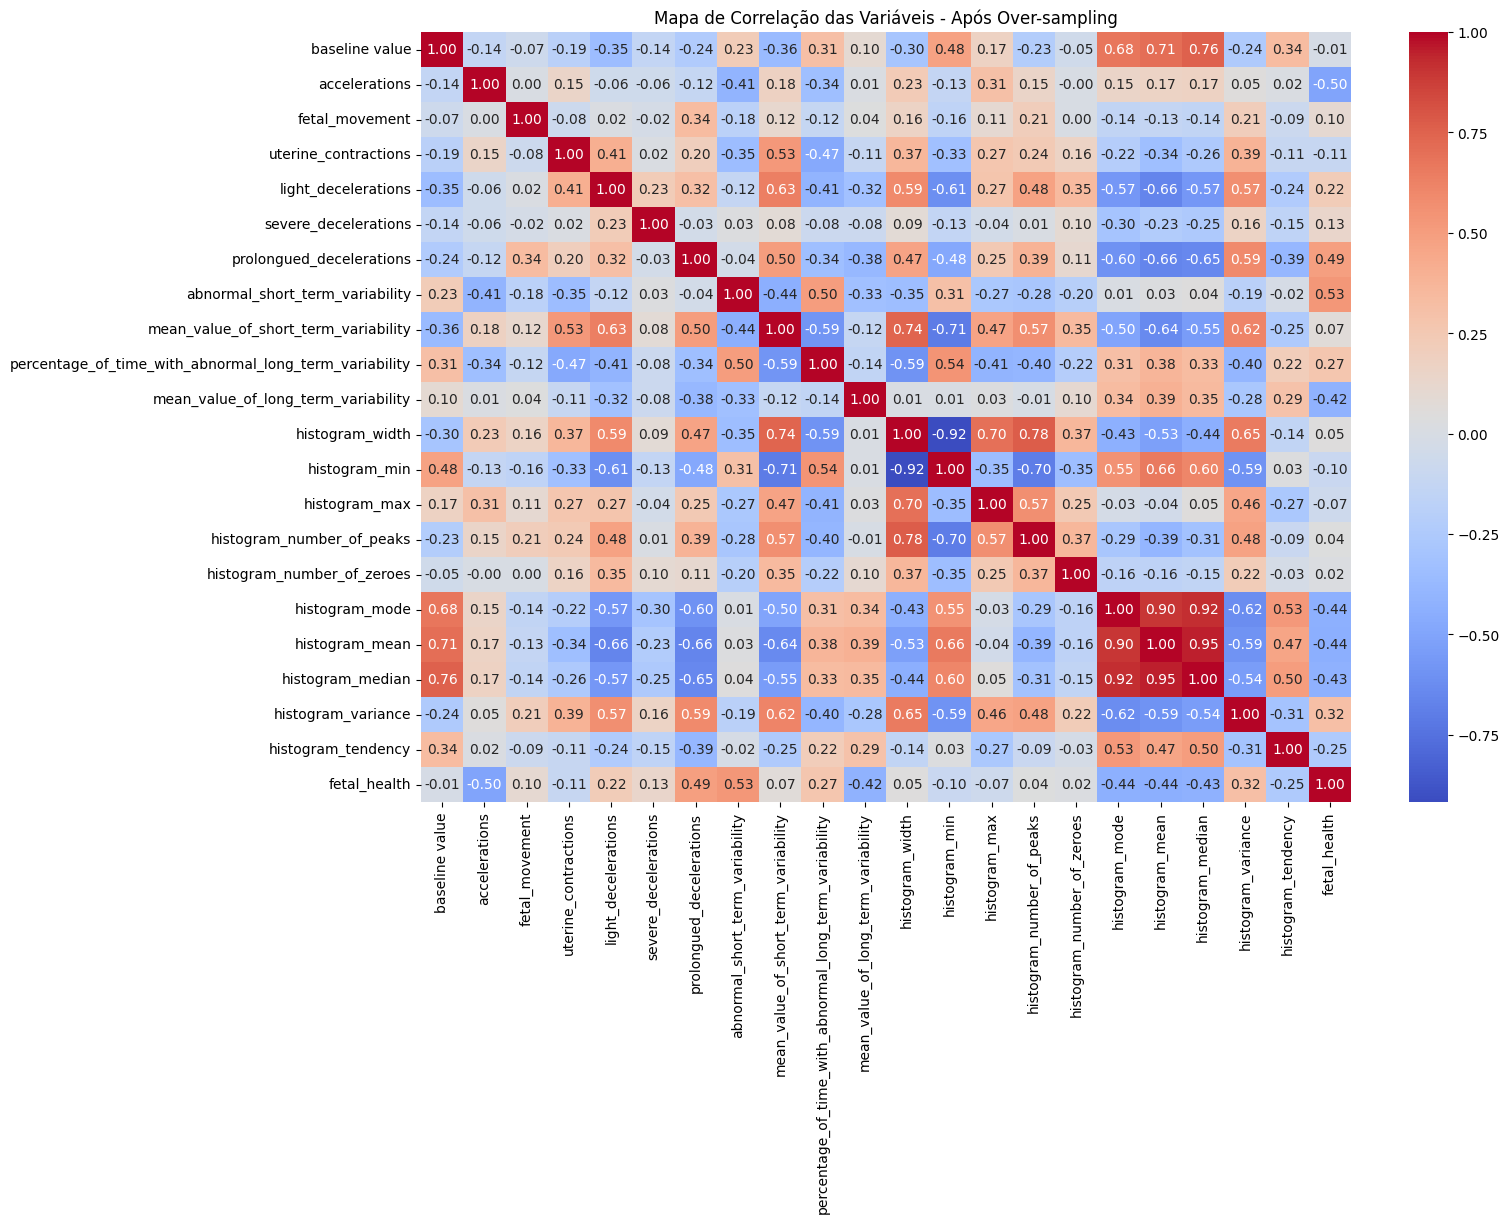

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Métricas para Over-sampling
Matriz de Confusão:
[[410  91  19]
 [ 96 339  50]
 [ 10  69 406]]


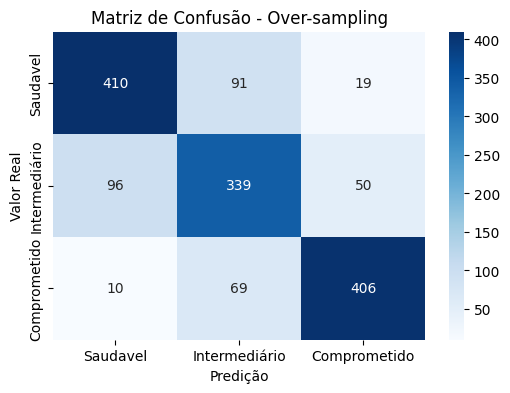

Relatório de Classificação:
              precision    recall  f1-score   support

         1.0       0.79      0.79      0.79       520
         2.0       0.68      0.70      0.69       485
         3.0       0.85      0.84      0.85       485

    accuracy                           0.78      1490
   macro avg       0.78      0.77      0.78      1490
weighted avg       0.78      0.78      0.78      1490

AUC-ROC: 0.9253463353336411


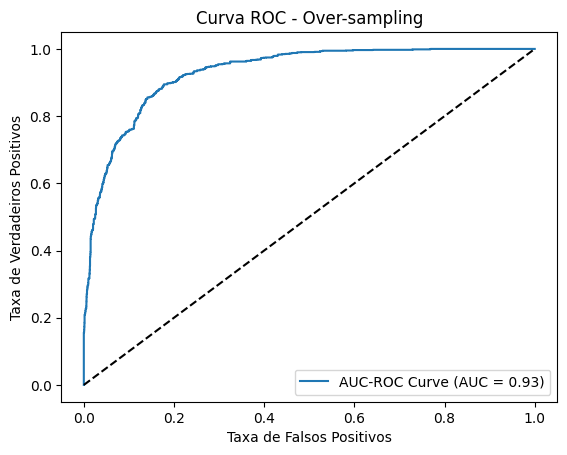

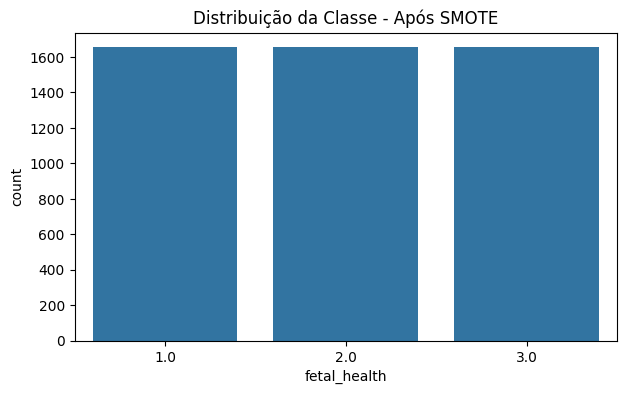

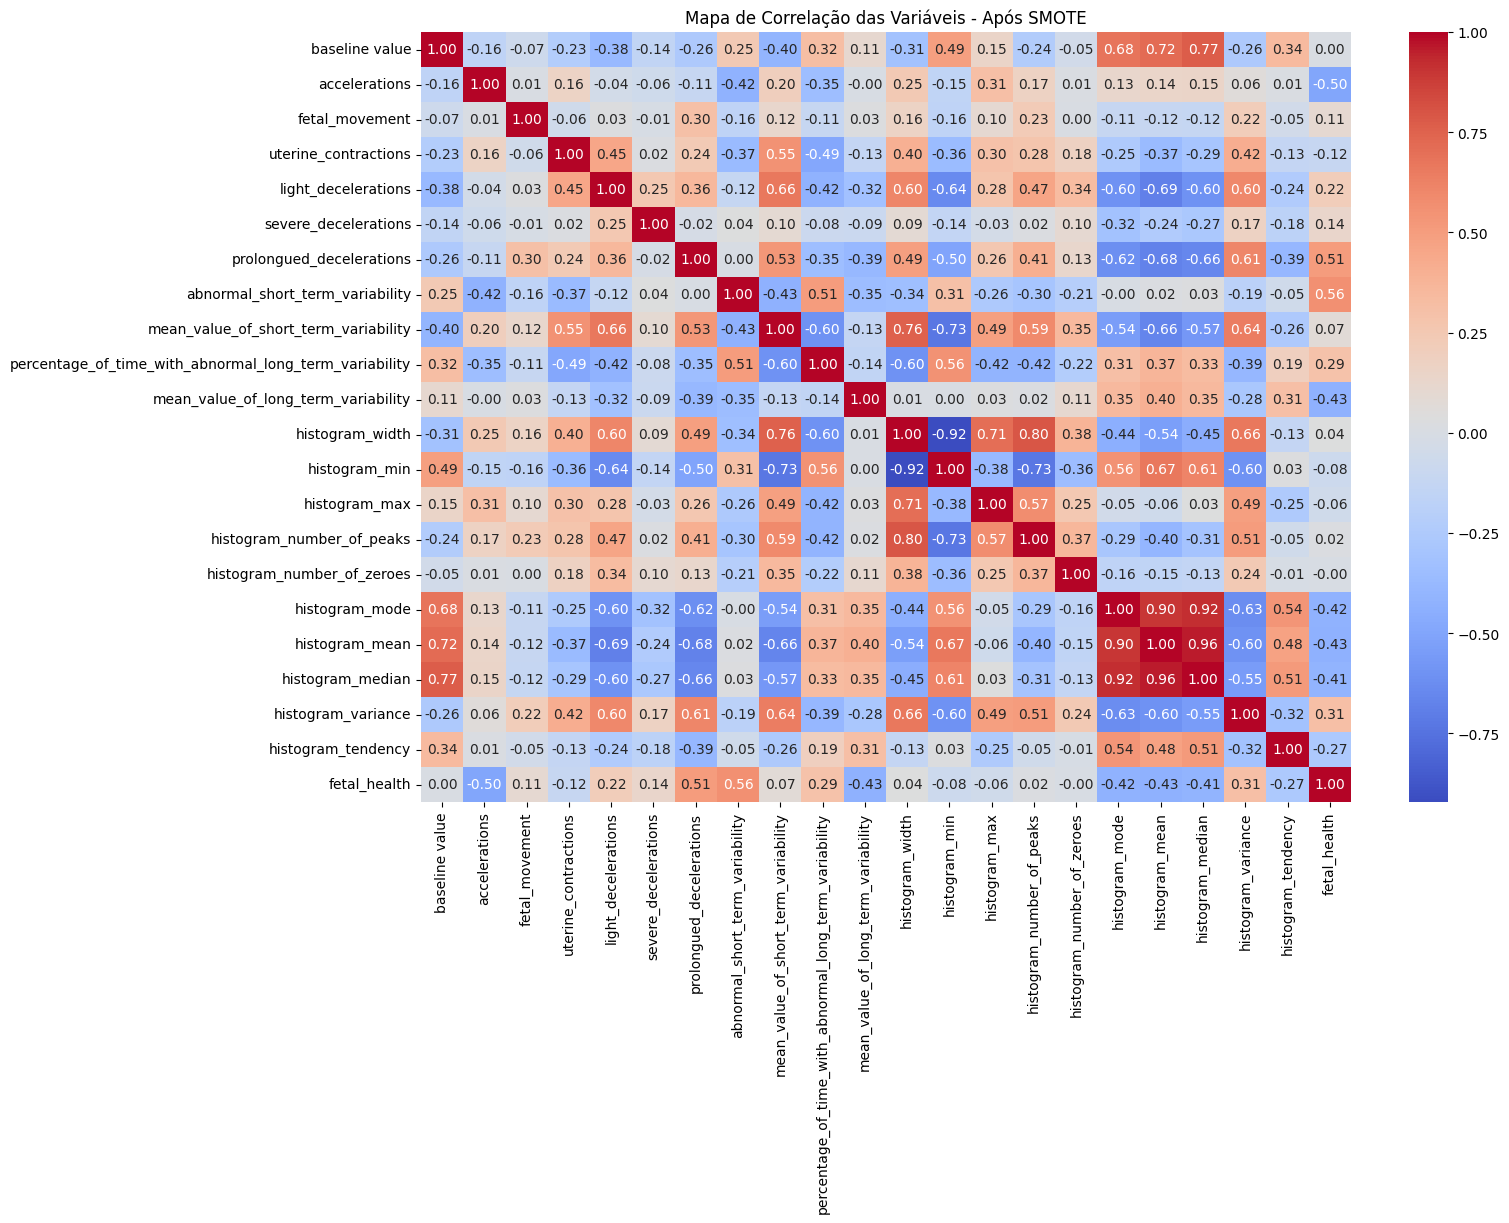

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Métricas para SMOTE
Matriz de Confusão:
[[408  94  18]
 [ 95 345  45]
 [  4  70 411]]


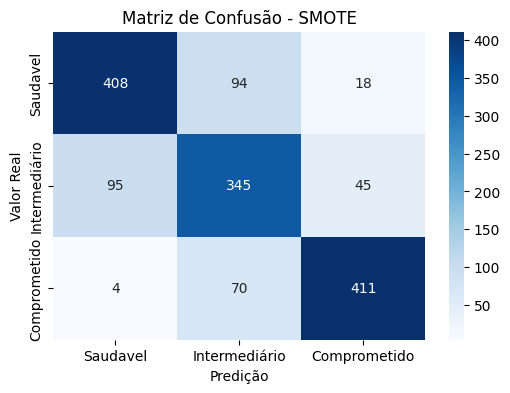

Relatório de Classificação:
              precision    recall  f1-score   support

         1.0       0.80      0.78      0.79       520
         2.0       0.68      0.71      0.69       485
         3.0       0.87      0.85      0.86       485

    accuracy                           0.78      1490
   macro avg       0.78      0.78      0.78      1490
weighted avg       0.78      0.78      0.78      1490

AUC-ROC: 0.9252219572241883


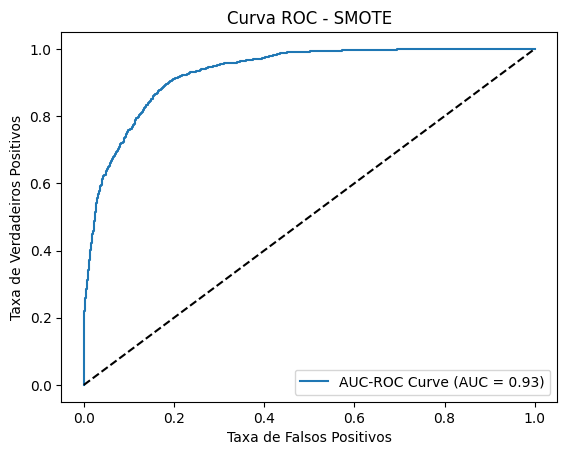


Resultados Comparativos de Balanceamento:
Under-sampling: AUC-ROC = 0.9350, F1-score Minor Class = 0.7111
Over-sampling: AUC-ROC = 0.9253, F1-score Minor Class = 0.7915
SMOTE: AUC-ROC = 0.9252, F1-score Minor Class = 0.7945

Melhor método de balanceamento: Under-sampling com AUC-ROC = 0.9350 e F1-score Minor Class = 0.7111


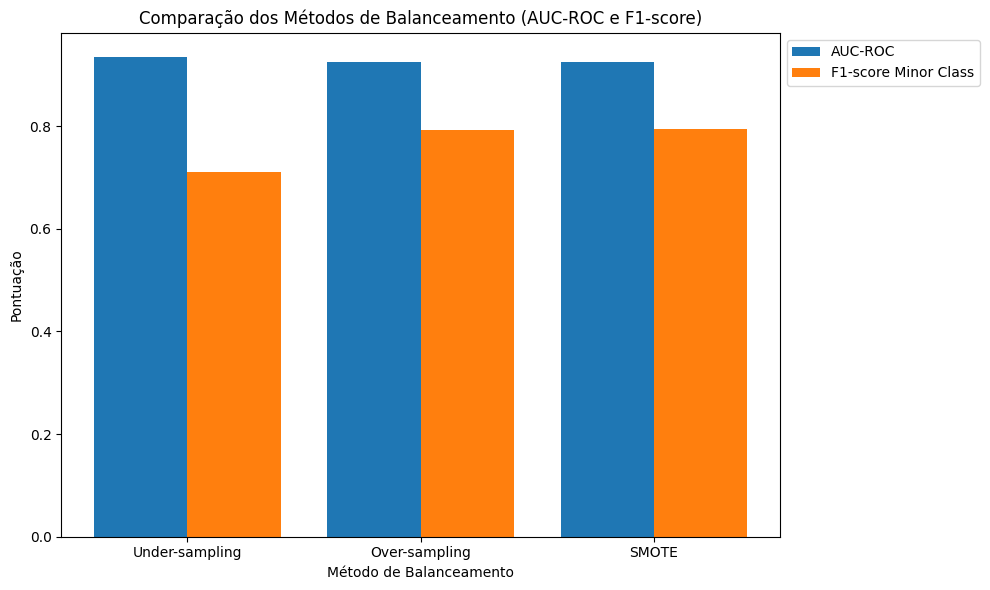

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize  # Import label_binarize


# Função para visualização de distribuição de classes e correlação
def plot_class_distribution_and_correlation(data, title, target):
    plt.figure(figsize=(7, 4))
    sns.countplot(x=target, data=data)
    plt.title(f'Distribuição da Classe - {title}')
    plt.show()

    num_data = data.select_dtypes(include=[np.number])

    plt.figure(figsize=(15, 10))
    correlation = num_data.corr()
    sns.heatmap(correlation, cmap="coolwarm", annot=True, fmt='.2f')
    plt.title(f"Mapa de Correlação das Variáveis - {title}")
    plt.show()

# Função para comparar os efeitos do balanceamento e gerar um gráfico comparativo
def compare_balancing_effects(X, y, target):
    results = {}

    # Under-sampling
    rus = RandomUnderSampler(random_state=42)
    X_res, y_res = rus.fit_resample(X, y)
    data_resampled_rus = pd.DataFrame(X_res, columns=X.columns)
    data_resampled_rus[target] = y_res
    plot_class_distribution_and_correlation(data_resampled_rus, "Após Under-sampling", target)
    roc_auc, f1_score_minor = evaluate_model(X_res, y_res, "Under-sampling")
    results["Under-sampling"] = {"AUC-ROC": roc_auc, "F1-score Minor Class": f1_score_minor}

    # Over-sampling
    ros = RandomOverSampler(random_state=42)
    X_res, y_res = ros.fit_resample(X, y)
    data_resampled_ros = pd.DataFrame(X_res, columns=X.columns)
    data_resampled_ros[target] = y_res
    plot_class_distribution_and_correlation(data_resampled_ros, "Após Over-sampling", target)
    roc_auc, f1_score_minor = evaluate_model(X_res, y_res, "Over-sampling")
    results["Over-sampling"] = {"AUC-ROC": roc_auc, "F1-score Minor Class": f1_score_minor}

    # SMOTE
    smote = SMOTE(random_state=42)
    X_res, y_res = smote.fit_resample(X, y)
    data_resampled_smote = pd.DataFrame(X_res, columns=X.columns)
    data_resampled_smote[target] = y_res
    plot_class_distribution_and_correlation(data_resampled_smote, "Após SMOTE", target)
    roc_auc, f1_score_minor = evaluate_model(X_res, y_res, "SMOTE")
    results["SMOTE"] = {"AUC-ROC": roc_auc, "F1-score Minor Class": f1_score_minor}

    # Exibir resultados comparativos e identificar o melhor método
    print("\nResultados Comparativos de Balanceamento:")
    for method, metrics in results.items():
        print(f"{method}: AUC-ROC = {metrics['AUC-ROC']:.4f}, F1-score Minor Class = {metrics['F1-score Minor Class']:.4f}")

    # Identificar o método com melhor AUC-ROC e, em caso de empate, com maior F1-score da classe minoritária
    best_method = max(results, key=lambda x: (results[x]["AUC-ROC"], results[x]["F1-score Minor Class"]))
    print(f"\nMelhor método de balanceamento: {best_method} com AUC-ROC = {results[best_method]['AUC-ROC']:.4f} e F1-score Minor Class = {results[best_method]['F1-score Minor Class']:.4f}")

    # Gráfico Comparativo dos Resultados
    methods = list(results.keys())
    auc_scores = [results[method]["AUC-ROC"] for method in methods]
    f1_scores = [results[method]["F1-score Minor Class"] for method in methods]

    plt.figure(figsize=(10, 6))
    x = range(len(methods))
    plt.bar([p - 0.2 for p in x], auc_scores, width=0.4, label='AUC-ROC', align='center')
    plt.bar([p + 0.2 for p in x], f1_scores, width=0.4, label='F1-score Minor Class', align='center')
    plt.xticks(x, methods)
    plt.xlabel("Método de Balanceamento")
    plt.ylabel("Pontuação")
    plt.title("Comparação dos Métodos de Balanceamento (AUC-ROC e F1-score)")
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))  # Posicionar a legenda fora do gráfico
    plt.tight_layout()  # Ajustar o layout para evitar cortes
    plt.show()

# Função para calcular e exibir métricas de avaliação
def evaluate_model(X, y, balance_method):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # Predição e Probabilidades
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)

    # Matriz de Confusão
    cm = confusion_matrix(y_test, y_pred)
    print(f"\nMétricas para {balance_method}")
    print("Matriz de Confusão:")
    print(cm)

    # Gráfico da Matriz de Confusão
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Saudavel", "Intermediário", 'Comprometido'], yticklabels=["Saudavel", "Intermediário", 'Comprometido'])
    plt.xlabel("Predição")
    plt.ylabel("Valor Real")
    plt.title(f"Matriz de Confusão - {balance_method}")
    plt.show()

    # Relatório de Classificação
    print("Relatório de Classificação:")
    report = classification_report(y_test, y_pred, output_dict=True)
    print(classification_report(y_test, y_pred))

    # AUC-ROC
    roc_auc = roc_auc_score(y_test, y_proba, multi_class='ovr')  # or multi_class='ovo')
    print("AUC-ROC:", roc_auc)

    # Curva ROC - Modification for multiclass
    # Binarize the output
    y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
    n_classes = y_test_bin.shape[1]

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc_dict = dict() # Changed variable name to avoid conflict
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
        roc_auc_dict[i] = roc_auc_score(y_test_bin[:, i], y_proba[:, i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_proba.ravel())
    roc_auc_dict["micro"] = roc_auc_score(y_test_bin, y_proba, average="micro")

    plt.figure()
    plt.plot(fpr["micro"], tpr["micro"], label="AUC-ROC Curve (AUC = {:.2f})".format(roc_auc_dict["micro"]))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("Taxa de Falsos Positivos")
    plt.ylabel("Taxa de Verdadeiros Positivos")
    plt.title(f"Curva ROC - {balance_method}")
    plt.legend(loc="lower right")
    plt.show()

    # Retornar métricas para comparação
    f1_minor_class = report[str(y.unique()[1])]["f1-score"]
    return roc_auc, f1_minor_class

# Carregar dados e verificar distribuição original
data = pd.read_csv("fetal_health.csv")
target = 'fetal_health'

print(data.info())
print(data.head())

plot_class_distribution_and_correlation(data, "Dataset Original", target)

# Preparar variáveis independentes e dependentes
X = data.drop(target, axis=1)
y = data[target]

# # Comparar os efeitos dos métodos de balanceamento
compare_balancing_effects(X, y, target)